In [2]:
# Global imports and settings
%matplotlib inline
from preamble import *
plt.rcParams['savefig.dpi'] = 100 # Use 300 for PDF, 100 for slides
HTML('''<style>html, body{overflow-y: visible !important} .CodeMirror{min-width:105% !important;} .rise-enabled .CodeMirror, .rise-enabled .output_subarea{font-size:140%; line-height:1.2; overflow: visible;} .output_subarea pre{width:110%}</style>''') # For slides

# Introduction to Machine Learning
## In practice
Joaquin Vanschoren, Eindhoven Univeristy of Technology

## Overview
* Worldwind tour of algorithms
    * How to run them in Python (scikit-learn)
    * How to tune them to your data
* Next:
    * Data and experiment management with OpenML
    * Hands-on exercises

# scikit-learn
One of the most prominent Python libraries for machine learning:

* Contains many state-of-the-art machine learning algorithms
* Offers [comprehensive documentation](http://scikit-learn.org/stable/documentation) about each algorithm
* Widely used, and a wealth of [tutorials](http://scikit-learn.org/stable/user_guide.html) and code snippets are available 
* scikit-learn works well with numpy, scipy, pandas, matplotlib,...

## Algorithms
See the [Reference](http://scikit-learn.org/dev/modules/classes.html)

__Supervised learning:__

* Linear models (Ridge, Lasso, Elastic Net, ...)
* Support Vector Machines
* Tree-based methods (Classification/Regression Trees, Random Forests,...)
* Nearest neighbors
* Neural networks 
* Gaussian Processes
* Feature selection

__Unsupervised learning:__
    
* Clustering (KMeans, ...)
* Matrix Decomposition (PCA, ...)
* Manifold Learning (Embeddings)
* Density estimation
* Outlier detection

__Model selection and evaluation:__

* Cross-validation
* Grid-search
* Lots of metrics

### Data import
Multiple options:

* A few toy datasets are included in `sklearn.datasets`
* You can import data files (CSV) with `pandas` or `numpy`
* You can import 1000s of machine learning datasets from OpenML

## Example: classification
Classify types of Iris flowers (setosa, versicolor, or virginica) based on the flower sepals and petal leave sizes.
<img src="../images/01_iris_with_labels.jpg" alt="ml" style="width: 400px;"/>

Iris is included in scikitlearn, we can just load it.  
This will return a `Bunch` object (similar to a `dict`)

In [3]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

print("Keys of iris_dataset: {}".format(iris_dataset.keys()))
print(iris_dataset['DESCR'][:193] + "\n...")

Keys of iris_dataset: dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre
...


The targets (classes) and features are stored as `list`s, the data as an `ndarray`

In [4]:
print("Targets: {}".format(iris_dataset['target_names']))
print("Features: {}".format(iris_dataset['feature_names']))
print("Shape of data: {}".format(iris_dataset['data'].shape))
print("First 5 rows:\n{}".format(iris_dataset['data'][:5]))

Targets: ['setosa' 'versicolor' 'virginica']
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Shape of data: (150, 4)
First 5 rows:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


The targets are stored separately as an `ndarray`, with indices pointing to the features

In [5]:
print("Target names: {}".format(iris_dataset['target_names']))
print("Targets:\n{}".format(iris_dataset['target']))

Target names: ['setosa' 'versicolor' 'virginica']
Targets:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### Looking at your data
We can use a library called `pandas` to easily visualize our data. Note how several features allow to cleanly split the classes.

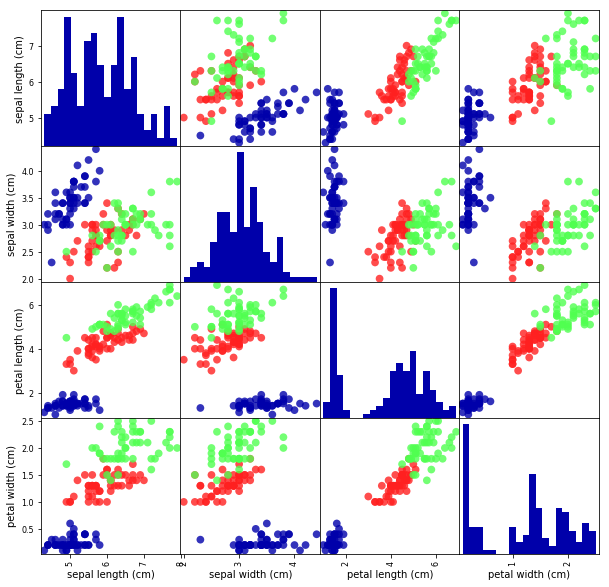

In [6]:
# Build a DataFrame with training examples and feature names
iris_df = pd.DataFrame(iris_dataset['data'], 
                       columns=iris_dataset.feature_names)

# scatter matrix from the dataframe, color by class
sm = pd.scatter_matrix(iris_df, c=iris_dataset['target'], figsize=(10, 10), 
                  marker='o', hist_kwds={'bins': 20}, s=60, 
                  alpha=.8, cmap=mglearn.cm3)

### Building your first model
All scikitlearn classifiers follow the same interface

```python
class SupervisedEstimator(...):
    def __init__(self, hyperparam, ...):

    def fit(self, X, y):   # Fit/model the training data
        ...                # given data X and targets y
        return self
     
    def predict(self, X):  # Make predictions
        ...                # on unseen data X  
        return y_pred
    
    def score(self, X, y): # Predict and compare to true
        ...                # labels y                
        return score
```

### Training and testing data
To evaluate our classifier, we need to test it on unseen data.  
`train_test_split`: splits data randomly in 75% training and 25% test data.

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], 
    random_state=0)
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (112, 4)
y_train shape: (112,)
X_test shape: (38, 4)
y_test shape: (38,)


Note: there are several problems with this approach that we will discuss later:

* Why 75%? Are there better ways to split?
* What if one random split yields  different models than another?
* What if all examples of one class all end up in the training/test set?

### Fitting a model

The first model we'll build is called k-Nearest Neighbor, or kNN. More about that soon.  
kNN is included in `sklearn.neighbors`, so let's build our first model

In [7]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

### Making predictions
Let's create a new example and ask the kNN model to classify it

In [8]:
X_new = np.array([[5, 2.9, 1, 0.2]])
prediction = knn.predict(X_new)
print("Prediction: {}".format(prediction))
print("Predicted target name: {}".format(
       iris_dataset['target_names'][prediction]))

Prediction: [0]
Predicted target name: ['setosa']


### Evaluating the model
Feeding all test examples to the model yields all predictions

In [9]:
y_pred = knn.predict(X_test)
print("Test set predictions:\n {}".format(y_pred))

Test set predictions:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


We can now just count what percentage was correct

In [10]:
print("Score: {:.2f}".format(np.mean(y_pred == y_test)))

Score: 0.97


The `score` function does the same thing (by default)

In [11]:
print("Score: {:.2f}".format(knn.score(X_test, y_test) ))

Score: 0.97


## Cross-validation

- More stable, thorough way to estimate generalization performance
- _k-fold cross-validation_ (CV): split (randomized) data into _k_ equal-sized parts, called _folds_
    - First, fold 1 is the test set, and folds 2-5 comprise the training set
    - Then, fold 2 is the test set, folds 1,3,4,5 comprise the training set
    - Compute _k_ evaluation scores, aggregate afterwards (e.g. take the mean)

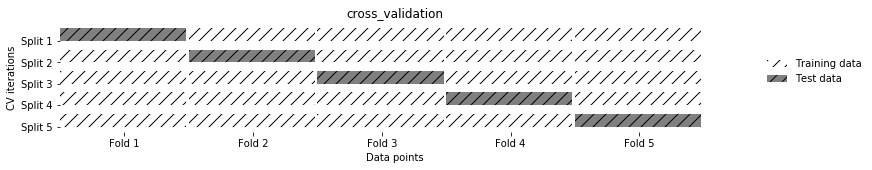

In [9]:
mglearn.plots.plot_cross_validation()

### Cross-validation in scikit-learn

- `cross_val_score` function with learner, training data, labels
- Returns list of all scores
    - Does 3-fold CV by default
    - Default scoring measures are accuracy (classification) or $R^2$ (regression)
- Even though models are built internally, they are not returned

``` python
logreg = LogisticRegression()
scores = cross_val_score(logreg, iris.data, iris.target)
print("Cross-validation scores: {}".format(scores))
```

In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression()

scores = cross_val_score(logreg, iris.data, iris.target)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.961 0.922 0.958]


- Change the number of folds with `cv` parameter
- Note that there can be quite some _variance_ in the results
    - Depends on the stability of the model and the amount of training data
    - Typically, the more training data, the more stable the models
    
``` python
scores = cross_val_score(logreg, iris.data, iris.target, cv=5)
```

- Aggregate the scores yourself (e.g. mean)
- This means that the model is 96% accurate _on average_

``` python
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("Variance in cross-validation score: {:.4f}".format(np.var(scores)))
```

In [12]:
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("Variance in cross-validation score: {:.4f}".format(np.var(scores)))

Average cross-validation score: 0.95
Variance in cross-validation score: 0.0003


### Benefits of cross-validation
- More robust: every training example will be in a test set exactly once
    - Model is evaluated on all samples, needs to do well on all
    - With a train-test split, we can be
        - 'lucky': all easy examples in test set
        - 'unlucky: all hard examples in test set
- Shows how _sensitive_ the model is to the exact training set
- Better estimation of true performance
    - 10-fold CV uses 90% of all data for training (vs 75% for holdout)
    - The higher _k_, the more accurate the estimation
- Disadvantage: computational cost, roughly _k_ times slower than holdout

### Stratified K-Fold cross-validation

- If the data is _unbalanced_, some classes have many fewer samples
- Likely that some classes are not present in the test set 
- Stratification: _proportions_ between classes are conserved in each fold
    - Order examples per class
    - Separate the samples of each class in _k_ sets (strata)
    - Combine corresponding strate into folds

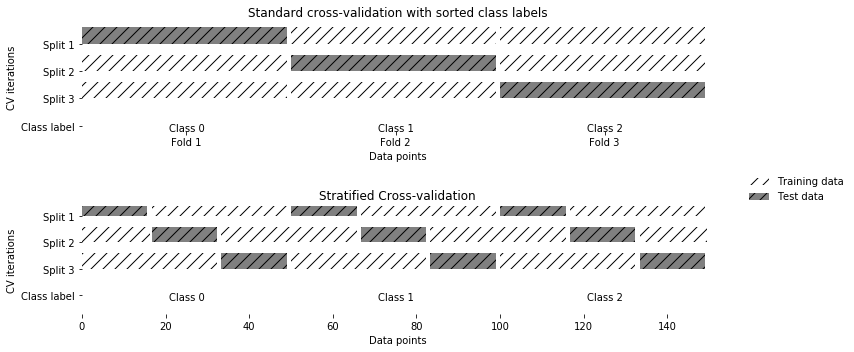

In [13]:
mglearn.plots.plot_stratified_cross_validation()

- scikit-learn (e.g. `cross_val_score`) will use:
    - stratified cross-validation by default for classification
    - normal cross-validation for regression
    - both are non-randomized (samples are not shuffled beforehand)
        - ordered data (e.g. time series) should never be randomized
- You can build folds manually with `KFold`
    - randomizable (`shuffle` parameter), non-stratified (!)
    
``` python
kfold = KFold(n_splits=5)
cross_val_score(logreg, iris.data, iris.target, cv=kfold
```

- Use `StratifiedKFold` to create stratified splits
    - randomizable (`shuffle` parameter), stratified
    
``` python
kfold = StratifiedKFold(n_splits=5, shuffle=True)
cross_val_score(logreg, iris.data, iris.target, cv=kfold)
```

## More data sampling variants
* See lecture 03 - Model Selection
* Leave-one-out cross-validation: for very small datasets
* Shuffle-Split cross-validation: whenever you need to shuffle the data first
* Repeated cross-validation: more trustworthy, but more expensive
* Cross-validation with groups: Whenever your data contains non-independent datapoints, e.g. data points from the same patient
* Bootstrapping: sampling with replacement, for extracting statistical properties

# Generalization, Overfitting and Underfitting
* We __hope__ that the model can _generalize_ from the training to the test data: make accurate predictions on unseen data
* It's easy to build a complex model that is 100% accurate on the training data, but very bad on the test data
* Overfitting: building a model that is _too complex for the amount of data_ that we have
    * You model peculiarities in your data (noise, biases,...)
    * Solve by making model simpler (regularization), or getting more data
* Underfitting: building a model that is _too simple given the complexity of the data_
    * Use a more complex model

* There is often a sweet spot that you need to find by optimizing the choice of algorithms and hyperparameters, or using more data.  
![model complexity image](../images/01_sphx_glr_plot_underfitting_overfitting_001.png)

### Bias-variance and overfitting
A learning algorithm makes 2 types of errors:
- Bias: data points are always predicted wrong because the model is underfitting
- Variance: predictions fluctuate a lot because the model is overfitting
<img src="../images/03_Bias-Variance-Tradeoff.png" alt="ml" style="width: 600px;"/>

Bias-Variance Flowchart (Andrew Ng, Coursera)
<img src="../images/03_Bias-Variance-Flowchart.png" alt="ml" style="width: 600px;"/>

## Hyperparameter tuning
* Most algorithms have parameters (hyperparameters) that control model complexity
* Now that we know how to evaluate models, we can improve them by `tuning` their hyperparameters for your data

We can basically use any optimization technique to optimize hyperparameters:
 
- __Grid search__
- __Random search__

More advanced techniques:

- Local search
- Racing algorithms
- Bayesian optimization
- Multi-armed bandits
- Genetic algorithms

### Grid Search

- For each hyperparameter, create a list of interesting/possible values
    - E.g. For kNN: k in [1,3,5,7,9,11,33,55,77,99]
    - E.g. For SVM: C and gamma in [$10^{-10}$..$10^{10}$]
- Evaluate all possible combination of hyperparameter values
    - E.g. using cross-validation
- Select the hyperparameter values yielding the best results
- A naive approach would be to just loop over all combinations

``` python
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination, train and evaluate an SVC
        svm = SVC(gamma=gamma, C=C);
        svm.fit(X_train, y_train);
        score = svm.score(X_test, y_test)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
```

In [19]:
# naive grid search implementation
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,
                                                    random_state=0)
print("Size of training set: {}   size of test set: {}".format(
      X_train.shape[0], X_test.shape[0]))

best_score = 0

# Note: we've seen the `C` parameter of SVMs, we'll see the `gamma` parameter later.
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination, train an SVC
        svm = SVC(gamma=gamma, C=C);
        svm.fit(X_train, y_train);
        # evaluate the SVC on the test set 
        score = svm.score(X_test, y_test)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
            
print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Size of training set: 112   size of test set: 38
Best score: 0.97
Best parameters: {'C': 100, 'gamma': 0.001}


#### Overfitting the parameters and the validation set
- Simply taking the best performing model yields optimistic results
- We've already used the test data to evaluate each hyperparameter setting!
- Hence, we don't have an independent test set to evaluate these hyperparameter settings
    - Information 'leaks' from test set into the final model
- Solution: Set aside part of the training data to evaluate the hyperparameter settings
    - Select best hyperparameters on validation set
    - Rebuild the model on the training+validation set
    - Evaluate optimal model on the test set

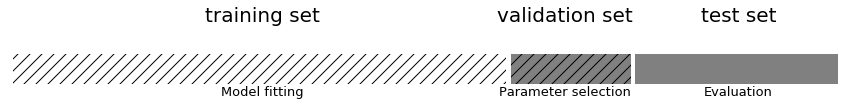

In [20]:
mglearn.plots.plot_threefold_split()

``` python
# split data into train+validation set and test set
X_trainval, X_test, y_trainval, y_test = train_test_split(
    iris.data, iris.target, random_state=0)
# split train+validation set into training and validation set
X_train, X_valid, y_train, y_valid = train_test_split(
    X_trainval, y_trainval, random_state=1)
```

In [21]:
from sklearn.svm import SVC
# split data into train+validation set and test set
X_trainval, X_test, y_trainval, y_test = train_test_split(
    iris.data, iris.target, random_state=0)
# split train+validation set into training and validation set
X_train, X_valid, y_train, y_valid = train_test_split(
    X_trainval, y_trainval, random_state=1)
print("Size of training set: {}   size of validation set: {}   size of test set:"
      " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters
        # train an SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # evaluate the SVC on the test set 
        score = svm.score(X_valid, y_valid)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

# rebuild a model on the combined training and validation set,
# and evaluate it on the test set
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))

Size of training set: 84   size of validation set: 28   size of test set: 38

Best score on validation set: 0.96
Best parameters:  {'C': 10, 'gamma': 0.001}
Test set score with best parameters: 0.92


#### Grid-search with cross-validation

- Same problem as before: the way that we split the data into training, validation, and test set may have a large influence on estimated performance
- We need to use cross-validation again, instead of a single split
- Expensive. Often, 3 or 5-fold CV is enough

``` python
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # train an SVC
        svm = SVC(gamma=gamma, C=C)
        # perform cross-validation
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        # compute mean cross-validation accuracy
        score = np.mean(scores)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
```

In [23]:
# manual grid search cv
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters
        # train an SVC
        svm = SVC(gamma=gamma, C=C)
        # perform cross-validation
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        # compute mean cross-validation accuracy
        score = np.mean(scores)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
# rebuild a model on the combined training and validation set
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Overall process

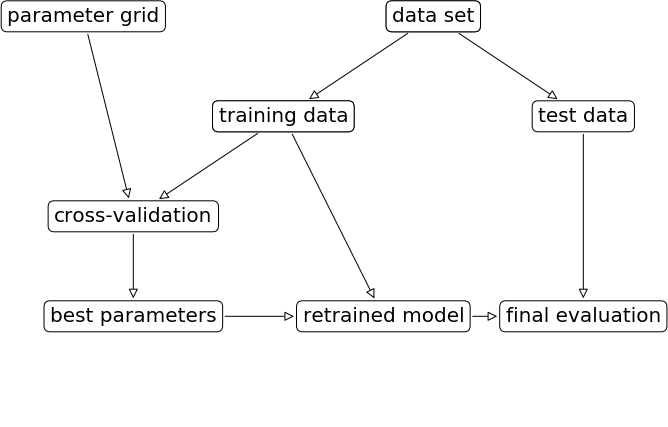

In [24]:
plt.rcParams['savefig.dpi'] = 75 # Avoid overlapping boxes
mglearn.plots.plot_grid_search_overview()
plt.rcParams['savefig.dpi'] = 100 # Back to normal

#### Grid search in scikit-learn
- Create a parameter grid as a dictionary
    - Keys are parameter names
    - Values are lists of hyperparameter values
    
``` python
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_grid))
```

In [25]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


- `GridSearchCV`: like a classifier that uses CV to automatically optimize its hyperparameters internally
    - Input: (untrained) model, parameter grid, CV procedure
    - Output: optimized model on given training data
    - Should only have access to training data
    
``` python
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
```

In [27]:
from sklearn.model_selection import GridSearchCV 
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
X_train, X_test, y_train, y_test = train_test_split(
        iris.data, iris.target, random_state=0)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

The optimized test score and hyperparameters can easily be retrieved:

``` python
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))```

In [29]:
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

Test set score: 0.97


``` python
grid_search.best_params_
grid_search.best_score_
```

In [30]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 100, 'gamma': 0.01}
Best cross-validation score: 0.97


``` python
grid_search.best_estimator_
```

In [32]:
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Best estimator:
SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


#### Visualizing hyperparameter impact
We can retrieve and visualize the cross-validation resulst to better understand the impact of hyperparameters
``` python
results = pd.DataFrame(grid_search.cv_results_)
```

In [34]:
import pandas as pd
# convert to Dataframe
results = pd.DataFrame(grid_search.cv_results_)
# Show the first 5 rows
display(results.head())

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,...,std_fit_time,std_score_time,std_test_score,std_train_score
0,1.41e-03,7.06e-04,0.37,0.37,...,1.17e-03,7.49e-04,0.01,2.85e-03
1,5.63e-04,2.92e-04,0.37,0.37,...,8.35e-05,6.95e-05,0.01,2.85e-03
2,6.26e-04,4.26e-04,0.37,0.37,...,1.10e-04,2.81e-04,0.01,2.85e-03
3,6.36e-04,4.72e-04,0.37,0.37,...,1.43e-04,2.93e-04,0.01,2.85e-03
4,5.99e-04,2.83e-04,0.37,0.37,...,4.95e-05,4.61e-05,0.01,2.85e-03


Visualize as a heatmap

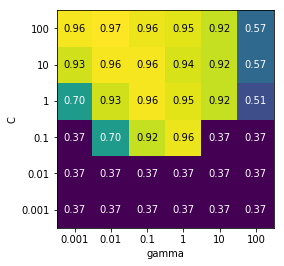

In [35]:
scores = np.array(results.mean_test_score).reshape(6, 6)
# plot the mean cross-validation scores
mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'],
                      ylabel='C', yticklabels=param_grid['C'], cmap="viridis");

When hyperparameters depend on other parameters, we can use lists of dictionaries to define the hyperparameter space

``` python
param_grid = [{'kernel': ['rbf'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100],
               'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
              {'kernel': ['linear'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100]}]
```

In [37]:
param_grid = [{'kernel': ['rbf'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100],
               'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
              {'kernel': ['linear'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100]}]
print("List of grids:\n{}".format(param_grid))

List of grids:
[{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]


#### Nested cross-validation

- Note that we are still using a single split to create the outer test set
- We can also use cross-validation here
- Nested cross-validation:
    - Outer loop: split data in training and test sets
    - Inner loop: run grid search, splitting the training data into train and validation sets
- Result is a just a list of scores
    - There will be multiple optimized models and hyperparameter settings (not returned)
- To apply on future data, we need to train `GridSearchCV` on all data again

``` python
scores = cross_val_score(GridSearchCV(SVC(), param_grid, cv=5),
                         iris.data, iris.target, cv=5)
```

In [39]:
scores = cross_val_score(GridSearchCV(SVC(), param_grid, cv=5),
                         iris.data, iris.target, cv=5)
print("Cross-validation scores: ", scores)
print("Mean cross-validation score: ", scores.mean())

Cross-validation scores:  [0.967 1.    0.9   0.967 1.   ]
Mean cross-validation score:  0.9666666666666668


#### Parallelizing cross-validation and grid-search
- On a practical note, it is easy to parallellize CV and grid search
- `cross_val_score` and `GridSearchCV` have a `n_jobs` parameter defining the number of cores it can use.
    - set it to `n_jobs=-1` to use all available cores.

### Random Search

- Grid Search has a few downsides:
    - Optimizing many hyperparameters creates a combinatorial explosion
    - You have to predefine a grid, hence you may jump over optimal values
- Random Search:
    - Picks `n_iter` random parameter values
    - Scales better, you control the number of iterations
    - Often works better in practice, too
        - not all hyperparameters interact strongly
        - you don't need to explore all combinations

- Executing random search in scikit-learn:
    - `RandomizedSearchCV` works like `GridSearchCV`
    - Has `n_iter` parameter for the number of iterations
    - Search grid can use distributions instead of fixed lists
    
``` python
param_grid = {'C': expon(scale=100), 
              'gamma': expon(scale=.1)}
random_search = RandomizedSearchCV(SVC(), param_distributions=param_grid,
                                   n_iter=20)
random_search.fit(X_train, y_train)
random_search.best_estimator_
```

In [42]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon

param_grid = {'C': expon(scale=100), 
              'gamma': expon(scale=.1)}
random_search = RandomizedSearchCV(SVC(), param_distributions=param_grid,
                                   n_iter=20)
X_train, X_test, y_train, y_test = train_test_split(
        iris.data, iris.target, random_state=0)
random_search.fit(X_train, y_train)
random_search.best_estimator_

SVC(C=8.704094352760858, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.08593431098258815,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

# Learning algorithms
In all supervised algorithms that we will discuss, we'll cover:

- How do they work
- How to control complexity
- Hyperparameters (user-controlled parameters)
- Strengths and weaknesses

# k-Nearest Neighbor

* Building the model consists only of storing the training dataset. 
* To make a prediction, the algorithm finds the _k_ closest data points in the training dataset

## k-Nearest Neighbor Classification
for k=1: return the class of the nearest neighbor

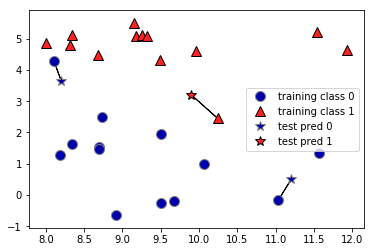

In [25]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

for k>1: do a vote and return the majority (or a confidence value for each class)

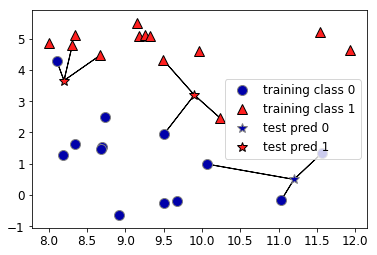

In [60]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

Let's build a kNN model for this dataset (called 'Forge')

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
clf = KNeighborsClassifier(n_neighbors=19)
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=19, p=2,
           weights='uniform')

In [66]:
print("Test set accuracy: %.2f" % clf.score(X_test, y_test))

Test set accuracy: 0.43


#### Analysis
We can plot the prediction for each possible input to see the _decision boundary_

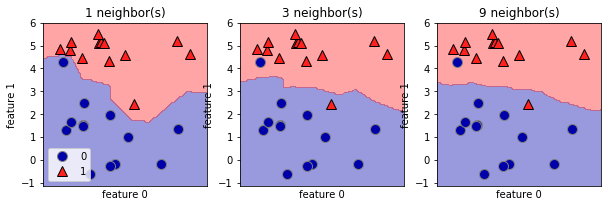

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
_ = axes[0].legend(loc=3)

Using few neighbors corresponds to high model complexity (left), and using many neighbors corresponds to low model complexity and smoother decision boundary (right).

We can more directly measure the effect on the training and test error on a larger dataset (breast_cancer)
* It first overfits, then underfits
* Tune the number of neighbors to your dataset to find the sweet spot

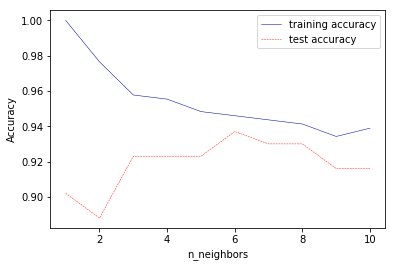

In [17]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

# Build a list of the training and test scores for increasing k
training_accuracy = []
test_accuracy = []
k = range(1, 11)

for n_neighbors in k:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train, y_train)
    # record training and test set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(k, training_accuracy, label="training accuracy")
plt.plot(k, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
_ = plt.legend()

For small numbers of neighbors, the model is too complex, and overfits the training data. As more neighbors are considered, the model becomes simpler and the training accuracy drops, yet the test accuracy increases, up to a point. After about 8 neighbors, the model starts becoming too simple (underfits) and the test accuracy drops again.

## k-Neighbors Regression
for k=1: return the target value of the nearest neighbor

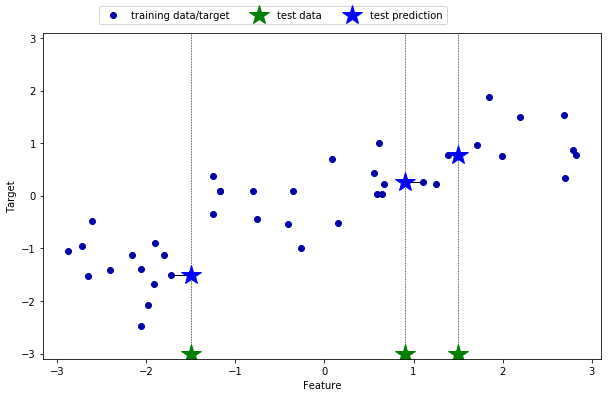

In [18]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

for k>1: return the _mean_ of the target values of the _k_ nearest neighbors

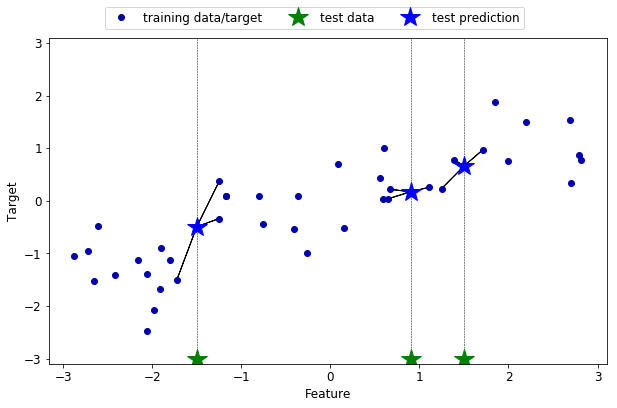

In [67]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

To do regression, simply use `KNeighborsRegressor` instead

In [20]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# split the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Instantiate the model, set the number of neighbors to consider to 3:
reg = KNeighborsRegressor(n_neighbors=3)
# Fit the model using the training data and training targets:
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=3, p=2,
          weights='uniform')

The default scoring function for regression models is $R^{2}$. It measures how much of the data variability is explained by the model, relative to just predicting the mean. Usually between 0 and 1 (<0 means you predictions are worse than just predicting the mean).

In [21]:
print("Test set predictions:\n{}".format(reg.predict(X_test)))

Test set predictions:
[-0.054  0.357  1.137 -1.894 -1.139 -1.631  0.357  0.912 -0.447 -1.139]


In [22]:
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set R^2: 0.83


#### Analysis
We can again output the predictions for each possible input, for different values of _k_.

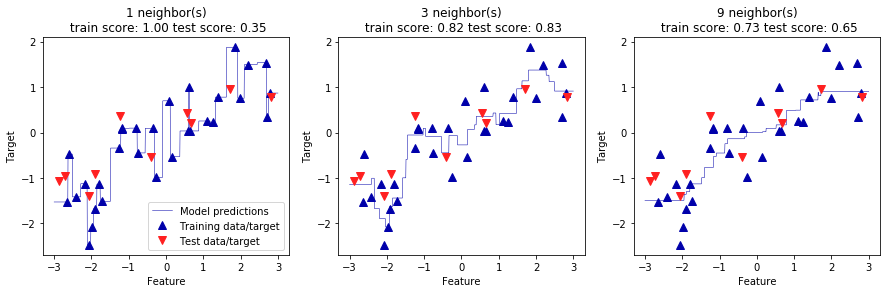

In [23]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # make predictions using 1, 3 or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
_ = axes[0].legend(["Model predictions", "Training data/target",
                "Test data/target"], loc="best")

We see that again, a small _k_ leads to an overly complex (overfitting) model, while a larger _k_ yields a smoother fit.

## kNN: Strengths, weaknesses and parameters
* There are two important hyperparameters:
    * n_neighbors: the number of neighbors used
    * metric: the distance measure used
        * Default is Minkowski (generalized Euclidean) distance.
* Easy to understand, works well in many settings
* Training is very fast, predicting is slow for large datasets
* Bad at high-dimensional and sparse data (curse of dimensionality)

# Linear models
Linear models make a prediction using a linear function of the input features. Can be very powerful for or datasets with many features. 

If you have more features than training data points, any target y can be perfectly modeled (on the training set) as a linear function.

## Linear models for regression
Prediction formula for input features x. $w_i$ and b are the _model parameters_ that need to be learned.  

$\hat{y} = w_0 * x_0 + w_1 * x_1 + ... + w_p * x_p + b$

There are many different algorithms, differing in how w and b are learned from the training data.

w[0]: 0.393906  b: -0.031804


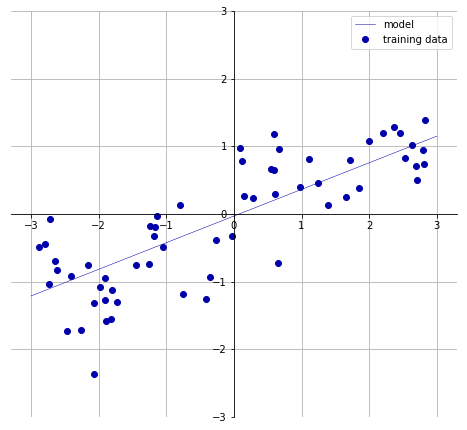

In [29]:
mglearn.plots.plot_linear_regression_wave()

### Linear Regression aka Ordinary Least Squares
* Finds the parameters w and b that minimize the _mean squared error_ between predictions and the true regression targets, y, on the training set. 
    * MSE: Sum of the squared differences between the predictions and the true values.
* Convex optimization problem with unique closed-form solution (if you have more data points than model parameters w)
* It has no hyperparameters, thus model complexity cannot be controlled.
    * Some other algorithms do: Ridge regression and Lasso

<img src="../images/02_least_squares.png" alt="ml" style="width: 600px;"/>

Linear regression can be found in `sklearn.linear_model`. We'll evaluate it on the Boston Housing dataset.

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

Has many large coefficients: sign of overfitting!

In [33]:
print("Weights (coefficients): {}".format(lr.coef_  

Weights (coefficients): [ -412.711   -52.243  -131.899   -12.004   -15.511    28.716    54.704
   -49.535    26.582    37.062   -11.828   -18.058   -19.525    12.203
  2980.781  1500.843   114.187   -16.97     40.961   -24.264    57.616
  1278.121 -2239.869   222.825    -2.182    42.996   -13.398   -19.389
    -2.575   -81.013     9.66      4.914    -0.812    -7.647    33.784
   -11.446    68.508   -17.375    42.813     1.14     -0.773    56.826
    14.288    53.955   -32.171    19.271   -13.885    60.634   -12.315
   -12.004   -17.724   -33.987     7.09     -9.225    17.198   -12.772
   -11.973    57.387   -17.533     4.101    29.367   -17.661    78.405
   -31.91     48.175   -39.534     5.23     21.998    25.648   -49.998
    29.146     8.943   -71.66    -22.815     8.407    -5.379     1.201
    -5.209    41.145   -37.825    -2.672   -25.522   -33.398    46.227
   -24.151   -17.753   -13.972   -23.552    36.835   -94.689   144.303
   -15.116   -14.951   -28.773   -31.767    24.955   

### Ridge regression
* Same formula as linear regression
* Adds a penalty term to the least squares sum : $\alpha \sum_{i} w_i^2$
* Requires that the coefficients (w) are close to zero.
    * Each feature should have as little effect on the outcome as possible 
* Regularization: explicitly restrict a model to avoid overfitting. 
* Type of L2 regularization: prefers many small weights
    * L1 regularization prefers sparsity: many weights to be 0, others large

`Ridge` can also be found in `sklearn.linear_model`.  
`ridge = Ridge().fit(X_train, y_train)`

Test set score is higher and training set score lower: less overfitting!

In [48]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.94
Test set score: 0.89


The strength of the regularization can be controlled with the `alpha` parameter. Default is 1.0.
* Increasing alpha forces coefficients to move more toward zero (more regularization)
* Decreasing alpha allows the coefficients to be less restricted (less regularization)
* Optimize alpha for your dataset

### Lasso
* Another form of regularization
* Adds a penalty term to the least squares sum : $\alpha \sum_{i} |w_i|$
* Prefers coefficients to be exactly zero (L1 regularization).
* Some features are entirely ignored by the model: automatic feature selection.
* Same parameter `alpha` to control the strength of regularization. 
* Weights are optimized using gradient descent
* New parameter `max_iter`: the maximum number of _gradient descent_ iterations
    * Should be higher for small values of `alpha`

### Optimization: Gradient Descent
<img src="../images/01_gradient_descent.jpg" alt="ml" style="width: 600px;"/>

### Gradient Descent
<img src="../images/01_gradient_descent_2D.png" alt="ml" style="width: 600px;"/>

### Gradient Descent
<img src="../images/01_gradient_descent_hill.png" alt="ml" style="width: 600px;"/>

* Run Lasso using the `Lasso` estimator
* Tune the alpha (and max_iter) to your dataset

In [51]:
from sklearn.linear_model import Lasso

lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("alpha={0}, max_iter={1}".format(lasso001.get_params()['alpha'],lasso001.get_params()['max_iter']))
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

alpha=0.01, max_iter=100000
Training set score: 0.94
Test set score: 0.89
Number of features used: 3


#### Linear models for Classification
Aims to find a (hyper)plane that separates the examples of each class.  
For binary classification (2 classes), we aim to fit the following function: 

$\hat{y} = w_0 * x_0 + w_1 * x_1 + ... + w_p * x_p + b > 0$  
    
When $\hat{y}<0$, predict class -1, otherwise predict class +1

##### Logistic regression
The logistic model uses the _logistic_ (or _sigmoid_) function to estimate the probability that a given sample belongs to class 1:
$$ z = f(x) = w_0 * x_0 + w_1 * x_1 + ... + w_p * x_p $$
$$ \hat{y} = Pr[1|x_1,...,x_k] = g(z) = \frac{1}{1+e^{-z}} $$
<img src="../images/01_logistic.png" alt="ml" style="width: 600px;"/>

##### Linear Support Vector Machine
Find hyperplane maximizing the _margin_ between the classes  
<img src="../images/01_svm.png" alt="ml" style="width: 600px;"/>
Prediction is identical to weighted kNN: find the support vector that is nearest, according to a distance measure (kernel) and a weight for each support vector.

* Logistic regression can be run with `linear_model.LogisticRegression`
* Linear SVMs can be run with `svm.LinearSVC`

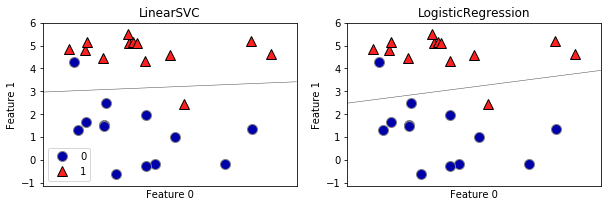

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend();

Both methods can be regularized:
* L2 regularization by default, L1 also possible
* _C_ parameter: inverse of strength of regularization
    * higher _C_: less regularization
    * penalty for misclassifying points while keeping $w_i$ close to 0
    
`logreg = LogisticRegression(C=1,penalty=l2).fit(X_train, y_train)`

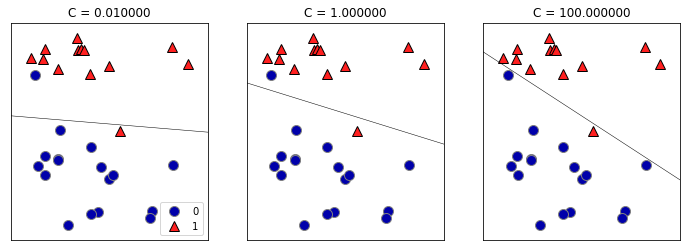

In [53]:
mglearn.plots.plot_linear_svc_regularization()

## Kernelized Support Vector Machines

* Linear models work well in high dimensional spaces.
* You can _create_ additional dimensions yourself.
* Let's start with an example.

Our linear model doesn't fit the data well

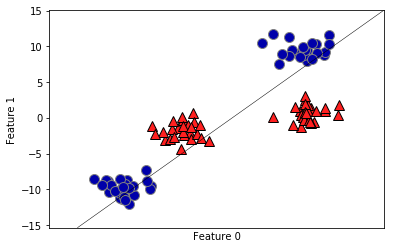

In [40]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.svm import LinearSVC
X, y = make_blobs(centers=4, random_state=8)
y = y % 2
linear_svm = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1");

We can add a new feature by taking the squares of feature1 values

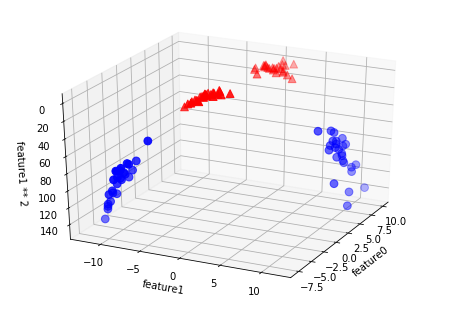

In [41]:
# add the squared first feature
X_new = np.hstack([X, X[:, 1:] ** 2])


from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# visualize in 3D
ax = Axes3D(figure, elev=-152, azim=-26)
# plot first all the points with y==0, then all with y == 1
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60)
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2");

We can now fit a linear model

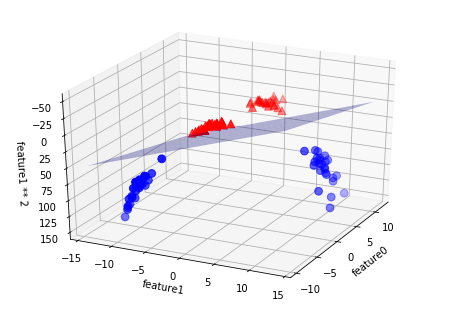

In [42]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# show linear decision boundary
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60)

ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2");

As a function of the original features, the linear SVM model is not actually linear anymore, but more of an ellipse

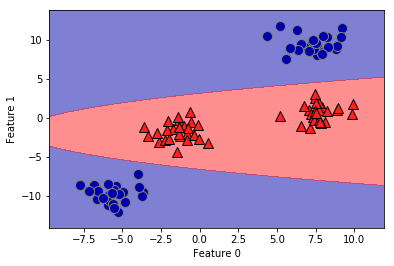

In [43]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
             cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1"); 

### Kernels

A (Mercer) Kernel on a space X is a (similarity) function  

$k: X \times X \rightarrow \mathbb{R}$

Of two arguments with the properties: 

- Symmetry: $k(x_1,x_2) = k(x_2,x_1) \,\,\, \forall x_1,x_2 \in X$
- Positive definite: for each finite subset of data points ${x_1,...,x_n}$, the kernel Gram matrix is positive semi-definite

Kernel matrix = $K \in \mathbb{R}^{n \times n}$ with $K_{ij} = k(x_i,x_j)$

#### Kernels: examples

- The inner product is a kernel. The standard inner product is the __linear kernel__:  
$k(x_1,x_2) = x_1^T x_2$

- Kernels can be constructed from other kernels $k_1$ and $k_2$:
    - For $\lambda \geq 0, \lambda . k_1$ is a kernel
    - $k_1 + k_2$ is a kernel
    - $k_1 . k_2$ is a kernel (thus also $k_1^n$)
- This allows to construct the __polynomial kernel__:  
$k(x_1,x_2) = (x_1^T x_2 + b)^d$, for $b \geq 0$ and $d \in \mathbb{N}$ 

- The 'radial base fucntion' (or __Gaussian__) kernel is defined as:  
$k(x_1,x_2) = exp(-\gamma ||x_1 - x_2||^2)$, for $\gamma \geq 0$ 
<img src="../images/05_gaussian_curves.png" alt="ml" style="width: 600px;"/>

Different kernels lead to different decision boundaries, because the distance to the support vectors is measured differently.

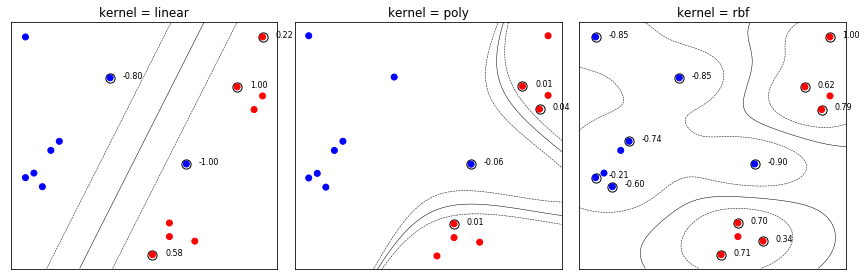

In [54]:
mglearn.plots.plot_svm_kernels()

The first important hyperparameter to tune is the choice of kernel
* RBF is _usually_ best

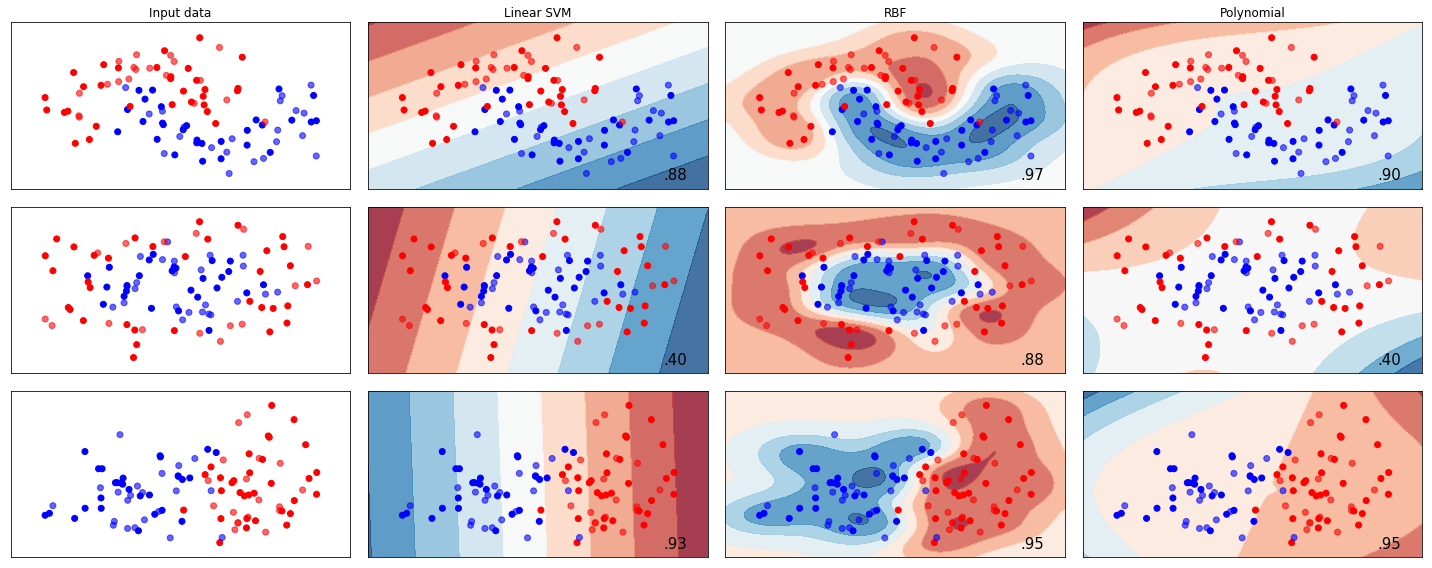

In [46]:
from sklearn.svm import SVC
import plot_classifiers
names = ["Linear SVM", "RBF", "Polynomial"]

classifiers = [
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    SVC(kernel="poly", degree=3, C=0.1)
    ]
 
plot_classifiers.plot_classifiers(names, classifiers, figuresize=(20,8)) 

But also:
- the amount of regulatization ('C')
    - Too low: underfitting, Too high: overfitting
- the hyperparameters of the kernel itself, e.g. 'gamma'
    - Too low: underfitting, Too high: overfitting

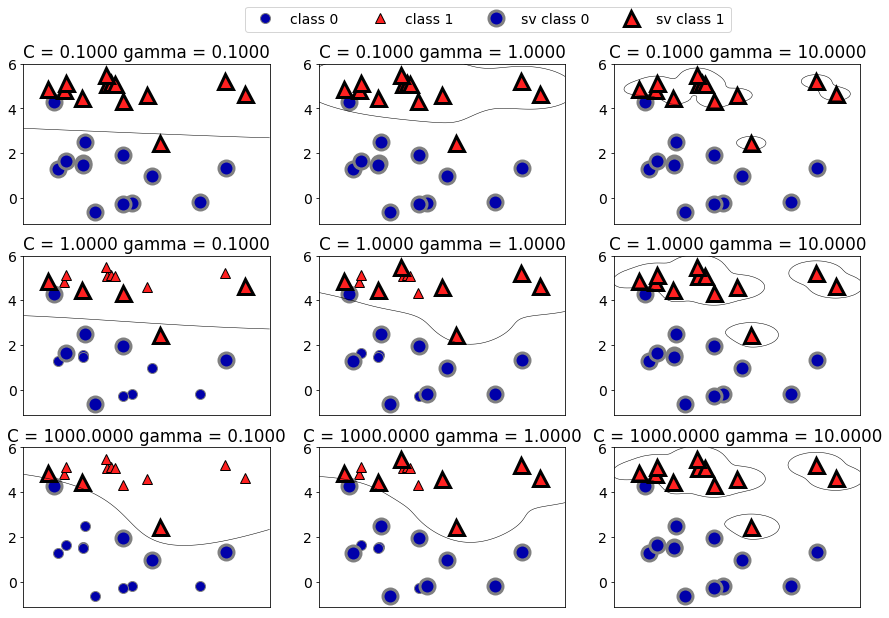

In [56]:
plt.rcParams.update({'font.size': 14})
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
        
axes[0, 0].legend(["class 0", "class 1", "sv class 0", "sv class 1"],
                  ncol=4, loc=(.9, 1.2));

### SVMs: Strengths, weaknesses and parameters

* SVMs allow complex decision boundaries, even with few features. 
* Work well on both low- and high-dimensional data

* Don't scale very well to large datasets (>100000)
* Require careful preprocessing of the data and tuning of the parameters. 
* SVM models are hard to inspect

Important parameters:
* regularization parameter _C_
* choice of the kernel and kernel-specific parameters
    * Typically string correlation with _C_

## Decision Trees
* Split the data in two (or more) parts
* Search over all possible splits and choose the one that is most _informative_
    * Many heuristics
    * E.g. _information gain_: how much does the entropy of the class labels decrease after the split (purer 'leafs')
* Repeat recursive partitioning

* In scikit-learn: `tree.DecisionTreeClassifier`

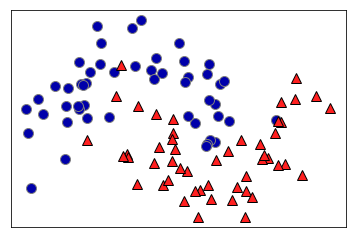

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
plt.figure()
ax = plt.gca()
mglearn.tools.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
ax.set_xticks(())
ax.set_yticks(());

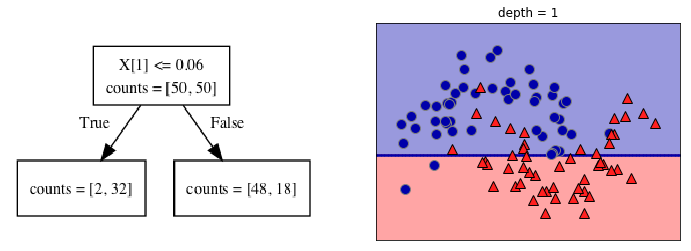

In [44]:
def plot_depth(depth):
    fig, ax = plt.subplots(1, 2, figsize=(12, 4),
                           subplot_kw={'xticks': (), 'yticks': ()})

    tree = mglearn.plots.plot_tree(X, y, max_depth=depth)
    ax[0].imshow(mglearn.plots.tree_image(tree))
    ax[0].set_axis_off()
plot_depth(1)

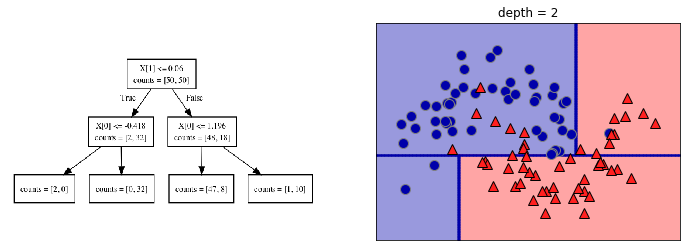

In [45]:
plot_depth(2)

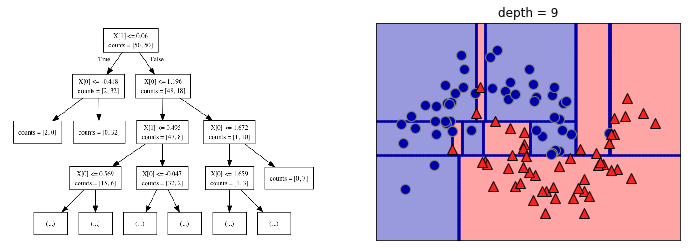

In [46]:
plot_depth(9)

### Overfitting: Controlling complexity of Decision Trees
Decision trees can very easily overfit the data. Regularization strategies:  

* Pre-pruning: stop creation of new leafs at some point
    * Limiting the depth of the tree, or the number of leafs
         - Use lower `max_depth`, `max_leaf_nodes`
    * Requiring a minimal leaf size (number of instances)
         - Use higher `min_samples_leaf` (default=1)

* Post-pruning: build full tree, then prune (join) leafs
    * Reduced error pruning: evaluate against held-out data
    * Many other strategies exist. 
    * scikit-learn supports none of them (yet)

In [64]:
tree = DecisionTreeClassifier(max_depth=5, random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.974


## Decision trees for regression
* Heuristic: Minimal quadratic distance
* Consider splits at every data point for every variable (or halfway between)
* Choose splits so that predicting the average of all leaf values gives the smallest error
* Otherwise, same hyperparameters to tune

In [61]:
def plot_decision_tree_regression(regr_1, regr_2):
    # Create a random dataset
    rng = np.random.RandomState(1)
    X = np.sort(5 * rng.rand(80, 1), axis=0)
    y = np.sin(X).ravel()
    y[::5] += 3 * (0.5 - rng.rand(16))

    # Fit regression model
    regr_1.fit(X, y)
    regr_2.fit(X, y)

    # Predict
    X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
    y_1 = regr_1.predict(X_test)
    y_2 = regr_2.predict(X_test)

    # Plot the results
    plt.figure(figsize=(8,6))
    plt.scatter(X, y, c="darkorange", label="data")
    plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
    plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
    plt.xlabel("data")
    plt.ylabel("target")
    plt.title("Decision Tree Regression")
    plt.legend()
    plt.show()

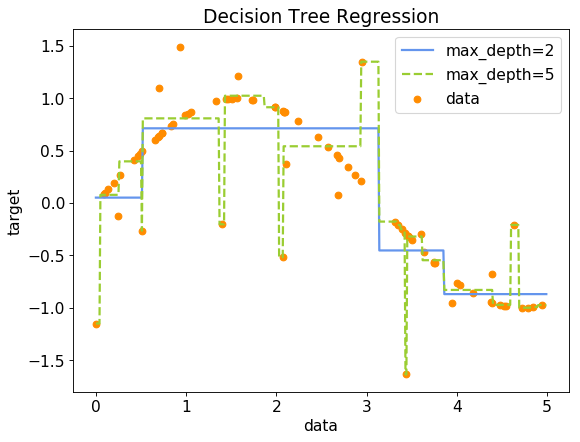

In [62]:
from sklearn.tree import DecisionTreeRegressor
plt.rcParams['figure.dpi'] = 80 
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)

plot_decision_tree_regression(regr_1,regr_2)

#### Decision trees: Strengths, weaknesses and parameters
* Work well with features on completely different scales, or a mix of binary and continuous features
    * Does not require normalization
* Interpretable, easily visualized
* Do not extrapolate well
* Still tend to overfit easily. Use ensembles of trees.

## Ensemble learning
Ensembles are methods that combine multiple machine learning models to create more powerful models. Most popular are:

* __RandomForests__: Build randomized trees on random samples of the data
* __Gradient boosting machines__: Build trees iteratively, giving higher weights to the points misclassified by previous trees

In both cases, predictions are made by doing a vote over the members of the example.  
__Stacking__ is another technique that builds a (meta)model over the predictions of each member.

### RandomForests
Reduce overfitting by averaging out individual predictions (variance reduction)  
In scikit-learn: `ensemble.RandomForestClassifier`

* Take a _bootstrap sample_ of your data
    * Randomly sample with replacement
    * Build a tree on each bootstrap
* Repeat `n_estimators` times 
    * Higher values: more trees, more smoothing
    * Make prediction by aggrating the individual tree predictions
        * a.k.a. Bootstrap aggregating (Bagging)
* RandomForest: Randomize trees by considering only a random subset of features of size `max_features` _in each node_
    * Small `max_features` yields more different trees, more smoothing
    * Default: $sqrt(n\_features)$ for classification, $log2(n\_features)$ for regression


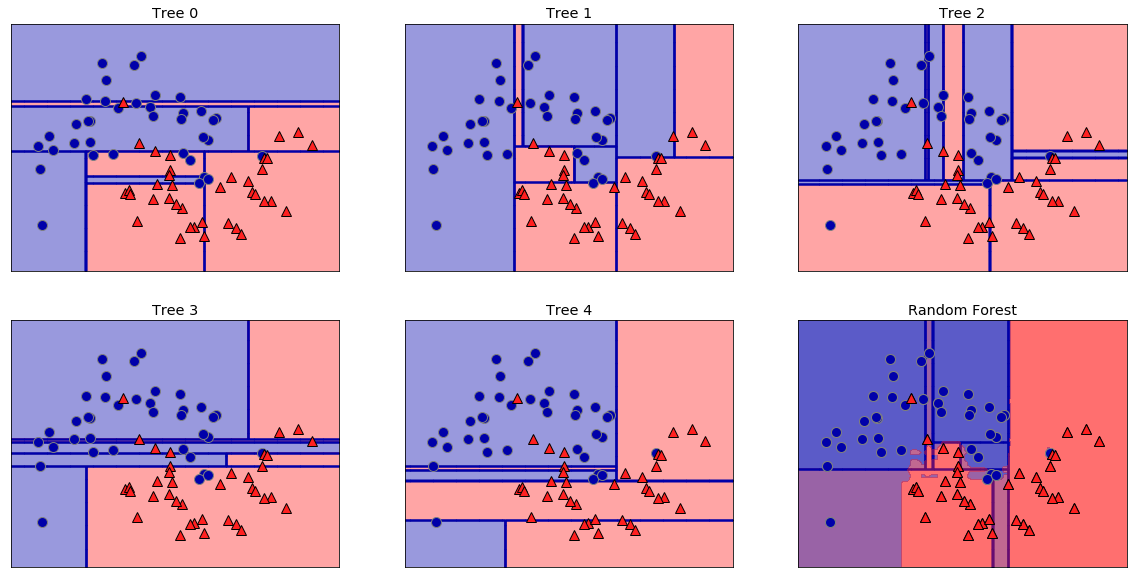

In [53]:
from sklearn.ensemble import RandomForestClassifier  
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=42)

forest = RandomForestClassifier(n_estimators=10, random_state=2)
forest.fit(X_train, y_train) 
 
plt.rcParams.update({'font.size': 12})
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1],
                                alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train);

## Gradient Boosting
Instead of reducing the variance of overfitted models, reduce the bias of underfitted models  
In scikit-learn: `ensemble.GradientBoostingClassifier`

* Use strong pre-pruning to build very shallow trees
    * Default `max_depth`=3
* Iteratively build new trees by increasing weights of points that were badly predicted
* Example of _additive modelling_: each tree depends on the outcome of previous trees
* Optimization: find optimal weights for all data points
    * Gradient descent (covered later) finds optimal set of weights
    * `learning rate` controls how strongly the weights are altered in each iteration (default 0.1)
* Repeat `n_estimators` times (default 100)

Example:
<img src="../images/04_boosting_0.png" alt="ml" style="width: 600px;"/>

After 1 iteration

- The simple decision tree divides space
- Misclassified points get higher weight (larger dots)

<img src="../images/04_boosting_1.png" alt="ml" style="width: 600px;"/>

After 3 iterations
<img src="../images/04_boosting_3.png" alt="ml" style="width: 600px;"/>

After 20 iterations
<img src="../images/04_boosting_20.png" alt="ml" style="width: 600px;"/>

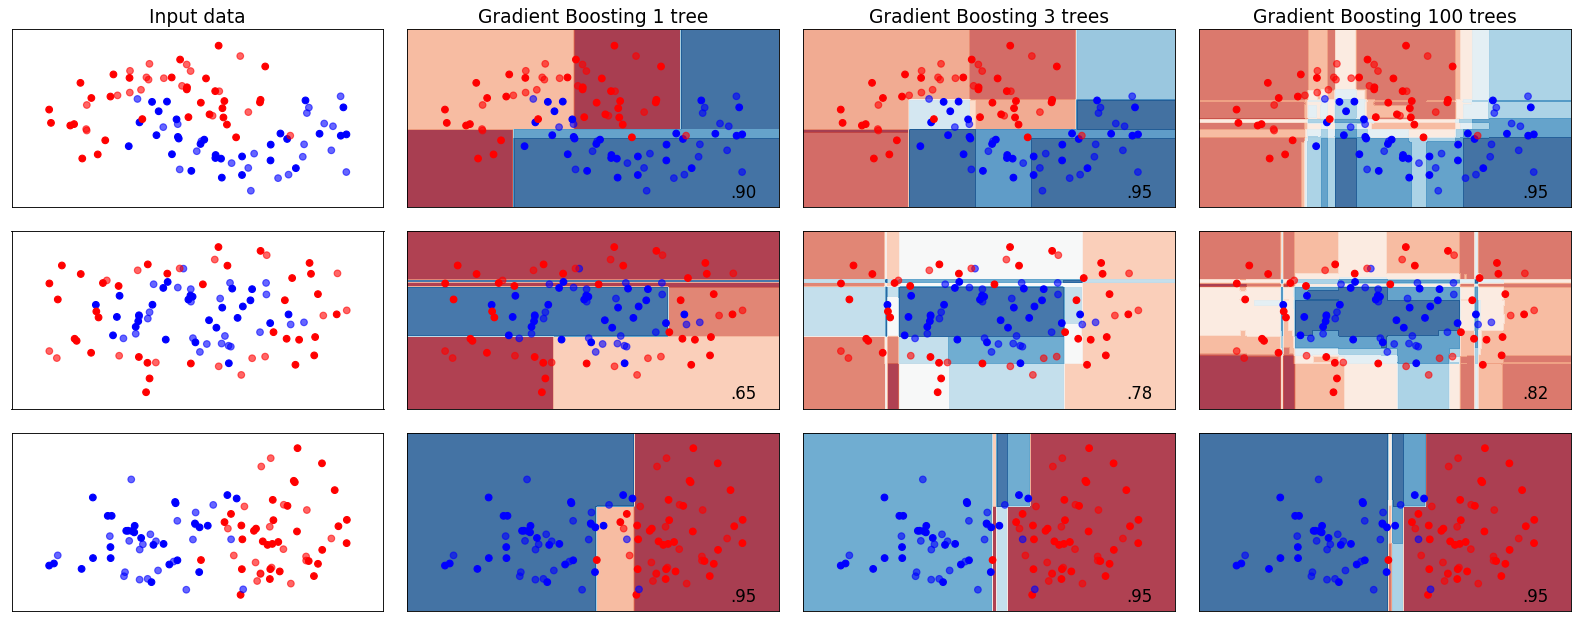

In [66]:
import plot_classifiers as pc
from sklearn.ensemble import GradientBoostingClassifier
names = ["Gradient Boosting 1 tree", "Gradient Boosting 3 trees", "Gradient Boosting 100 trees"]

classifiers = [
    GradientBoostingClassifier(n_estimators=1, random_state=0, learning_rate=0.5),
    GradientBoostingClassifier(n_estimators=3, random_state=0, learning_rate=0.5),
    GradientBoostingClassifier(n_estimators=100, random_state=0, learning_rate=0.5)
    ]

pc.plot_classifiers(names, classifiers, figuresize=(20,8))  

### Many more algorithms:
* Probabilistic techniques
    - Naive Bayes
    - Bayesian Networks
    - Gaussian Processes
* Graphical models
    - Hidden Markov models
    - ...
* Neural Networks
    - See next week